In [36]:
import os
import hopsworks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

load_dotenv()

# Connect to Hopsworks
project = hopsworks.login(
    api_key_value=os.getenv("HOPSWORKS_API_KEY"),
    project=os.getenv("HOPSWORKS_PROJECT")
)
fs = project.get_feature_store()

# Load computed US AQI feature group
fg = fs.get_feature_group("karachi_aqi_us", version=1)
df = fg.read()

2025-11-09 21:00:49,693 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-11-09 21:00:49,718 INFO: Initializing external client
2025-11-09 21:00:49,719 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-11-09 21:00:55,156 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1271981
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.76s) 


In [37]:
# Ensure datetime and sort
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')


In [38]:
print("=== Dataset Overview ===")
print(df.info())
print("\n=== Statistical Summary ===")
print(df.describe())



=== Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
Index: 2186 entries, 1144 to 2185
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype                  
---  ------                --------------  -----                  
 0   time                  2186 non-null   datetime64[us, Etc/UTC]
 1   pm10                  2186 non-null   float64                
 2   pm2_5                 2186 non-null   float64                
 3   carbon_monoxide       2186 non-null   float64                
 4   nitrogen_dioxide      2186 non-null   float64                
 5   sulphur_dioxide       2186 non-null   float64                
 6   ozone                 2186 non-null   float64                
 7   temperature_2m        2186 non-null   float64                
 8   relative_humidity_2m  2186 non-null   int64                  
 9   wind_speed_10m        2186 non-null   float64                
 10  aqi_pm25              2186 non-null   float64                

In [39]:
# =======================
print("\n=== Missing Values ===")
print(df.isna().sum())



=== Missing Values ===
time                    0
pm10                    0
pm2_5                   0
carbon_monoxide         0
nitrogen_dioxide        0
sulphur_dioxide         0
ozone                   0
temperature_2m          0
relative_humidity_2m    0
wind_speed_10m          0
aqi_pm25                0
aqi_pm10                0
aqi_o3                  0
us_aqi                  0
aqi_category            0
dtype: int64


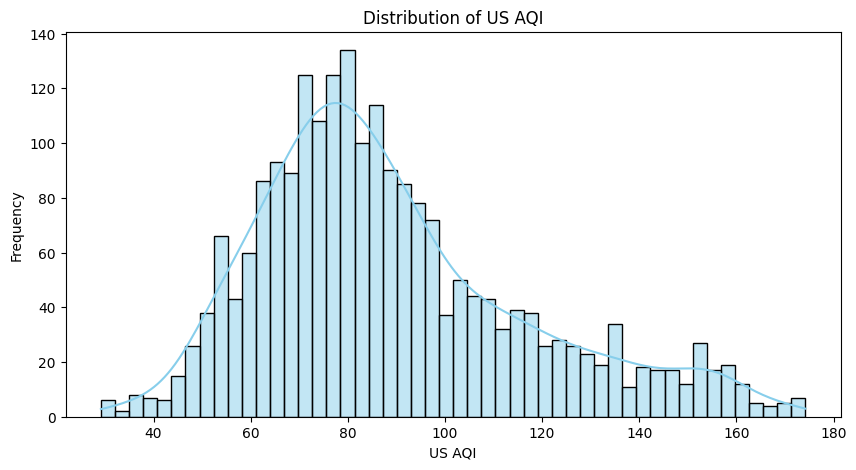

In [40]:
# US AQI Distribution
# =======================
plt.figure(figsize=(10,5))
sns.histplot(df['us_aqi'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of US AQI")
plt.xlabel("US AQI")
plt.ylabel("Frequency")
plt.show()

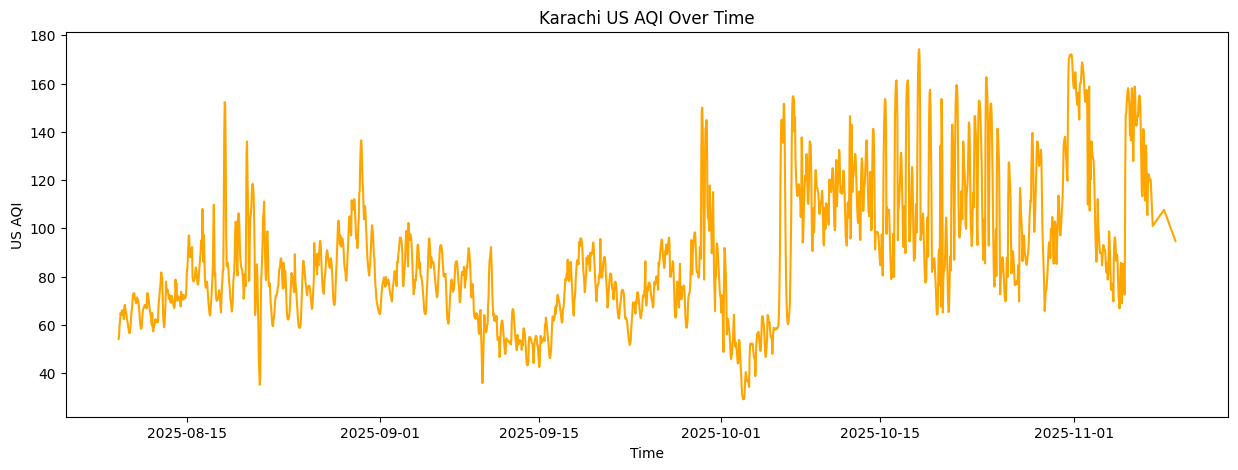

In [41]:
# AQI Over Time
# =======================
plt.figure(figsize=(15,5))
plt.plot(df['time'], df['us_aqi'], color='orange')
plt.title("Karachi US AQI Over Time")
plt.xlabel("Time")
plt.ylabel("US AQI")
plt.show()

2025-11-09 21:01:03,989 WARNING: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




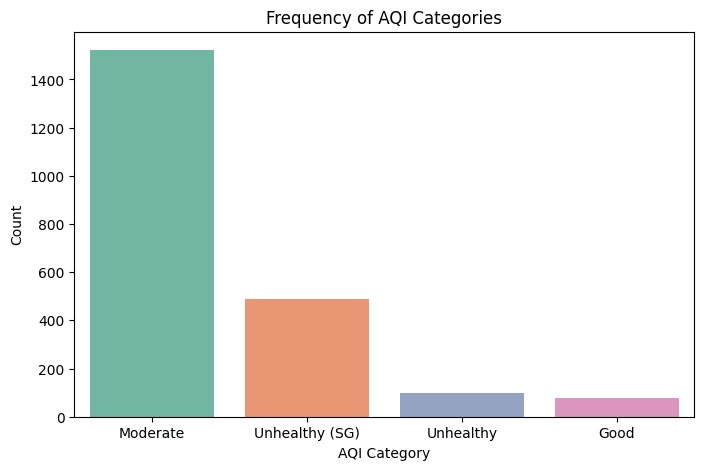

In [42]:
# AQI Categories Count
# =======================
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='aqi_category', order=df['aqi_category'].value_counts().index, palette='Set2')
plt.title("Frequency of AQI Categories")
plt.xlabel("AQI Category")
plt.ylabel("Count")
plt.show()

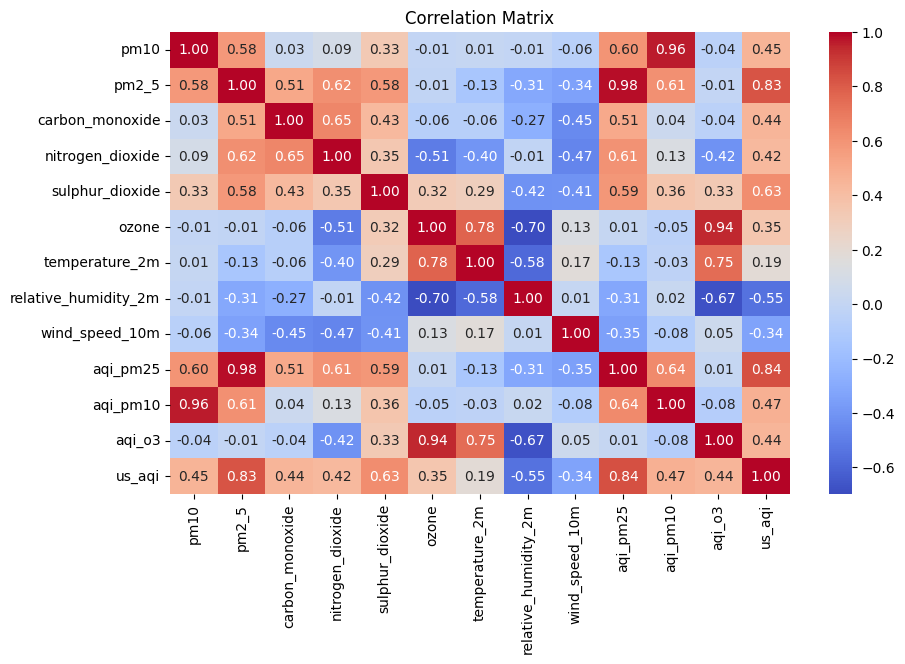

In [43]:
# Correlation with US AQI
# =======================
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [44]:
# Sort correlations with US AQI
print("\n=== Features Correlated with US AQI ===")
corr_us_aqi = corr['us_aqi'].sort_values(ascending=False)
print(corr_us_aqi)


=== Features Correlated with US AQI ===
us_aqi                  1.000000
aqi_pm25                0.838580
pm2_5                   0.825442
sulphur_dioxide         0.627705
aqi_pm10                0.471315
pm10                    0.452882
aqi_o3                  0.444635
carbon_monoxide         0.444115
nitrogen_dioxide        0.424354
ozone                   0.354773
temperature_2m          0.189574
wind_speed_10m         -0.339413
relative_humidity_2m   -0.549289
Name: us_aqi, dtype: float64


2025-11-09 21:01:04,715 WARNING: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




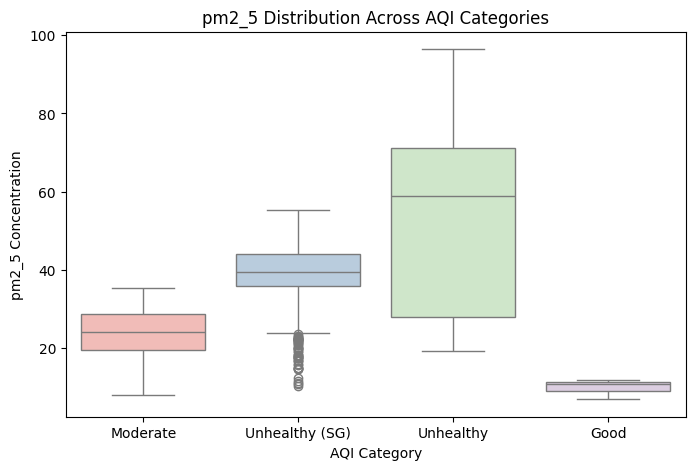

2025-11-09 21:01:05,053 WARNING: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




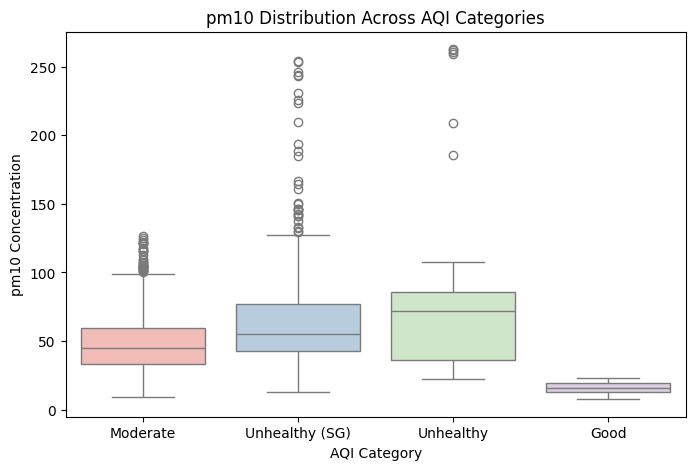

2025-11-09 21:01:05,183 WARNING: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




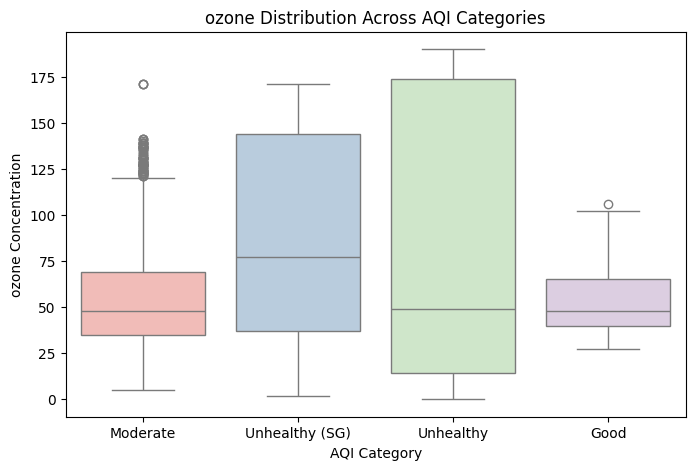

In [45]:
# Boxplots for Pollutants vs AQI Categories
# =======================
pollutants = ['pm2_5','pm10','ozone']
for pollutant in pollutants:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='aqi_category', y=pollutant, data=df, order=df['aqi_category'].value_counts().index, palette='Pastel1')
    plt.title(f"{pollutant} Distribution Across AQI Categories")
    plt.xlabel("AQI Category")
    plt.ylabel(f"{pollutant} Concentration")
    plt.show()

In [46]:
# Latest Observation
# =======================
print("\n=== Latest AQI Data ===")
print(df.tail(1))


=== Latest AQI Data ===
                          time  pm10  pm2_5  carbon_monoxide  \
2185 2025-11-09 23:00:00+00:00  51.1   32.9            909.0   

      nitrogen_dioxide  sulphur_dioxide  ozone  temperature_2m  \
2185              44.3             14.0   23.0            20.1   

      relative_humidity_2m  wind_speed_10m   aqi_pm25   aqi_pm10     aqi_o3  \
2185                    77             2.5  94.742489  47.314815  10.648148   

         us_aqi aqi_category  
2185  94.742489     Moderate  
